# 1.02 Load saved b1515 songs
### JX, 03/28/2023
> Find saved b1515 songs and first pass analyze them

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [2]:
bID = 's_b1515_23'

In [3]:
bID_DIR = PROCESSED_DIR / bID
bID_DIR

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23')

In [4]:
raw_DIR = bID_DIR / 'raw'

In [5]:
raw_DIR

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw')

In [6]:
wav_list = list(raw_DIR.glob('*.wav'))

In [7]:
wav_list

[PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023-03-24__0754_con_g0__2534698_2582558.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023-03-24__1311_stim_g0__5014799_5045779.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023-03-24__1311_stim_g0__4494394_4514099.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023-03-24__1311_stim_g0__4198874_4227759.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023-03-24__1311_stim_g0__5495219_5503809.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023-03-24__1311_stim_g0__144100_150190.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023-03-24__1311_stim_g0__6883109_6988584.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1515_23/raw/s_b1515_23_2023

In [8]:
import pandas as pd

In [9]:
bouts = pd.DataFrame(
    {
        "wav" : wav_list,
        "bID" : bID
    }
)

In [10]:
str(bouts.wav.values[0]).split('_')

['/mnt/cube/j8xing/starling',
 'rhythm',
 'mfdfa/data/s',
 'b1515',
 '23/raw/s',
 'b1515',
 '23',
 '2023-03-24',
 '',
 '0754',
 'con',
 'g0',
 '',
 '2534698',
 '2582558.wav']

In [11]:
song_type = [str(row.wav).split('__')[1] for i, row in bouts.iterrows()]
bouts['song_type'] = song_type

position = [str(row.wav).split('_')[-2] for i, row in bouts.iterrows()]
bouts['position'] = position

In [12]:
bouts = bouts[bouts.song_type != '1311_stim_g0']

In [13]:
from scipy.io.wavfile import read, write

In [14]:
lengths = [len(read(row.wav)[1])/read(row.wav)[0] for i, row in bouts.iterrows()]

In [15]:
bouts['lengths'] = lengths

In [16]:
bouts = bouts.reset_index()
bouts

,index,wav,bID,song_type,position,lengths
0,0,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,0754_con_g0,2534698,41.550000
1,7,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,0754_con_g0,498000,24.650000
2,8,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,0754_con_g0,1347845,10.841667
3,9,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,0754_con_g0,4021243,7.529167
4,10,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,0754_con_g0,2459703,15.683333
...,...,...,...,...,...,...
63,175,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,0754_con_g0,245455,25.225000
64,177,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,1547_g0,15172071,40.979167
65,191,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,0754_con_g0,2265373,26.637500
66,197,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1515_23,1547_g0,11688889,8.675000


In [17]:
bouts.song_type.value_counts()

0754_con_g0    43
1547_g0        25
Name: song_type, dtype: int64

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='lengths', ylabel='Density'>

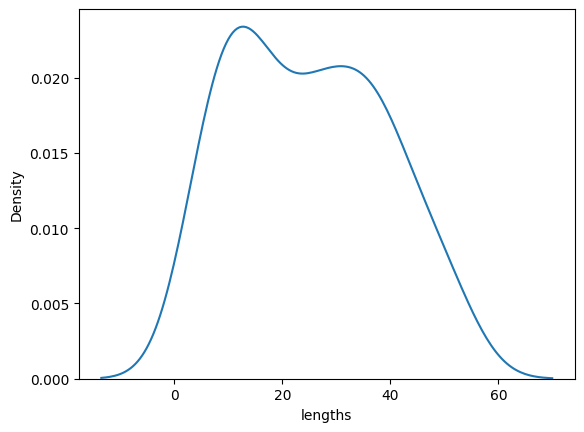

In [19]:
sns.kdeplot(data = bouts, x = 'lengths')

<AxesSubplot:xlabel='lengths', ylabel='Count'>

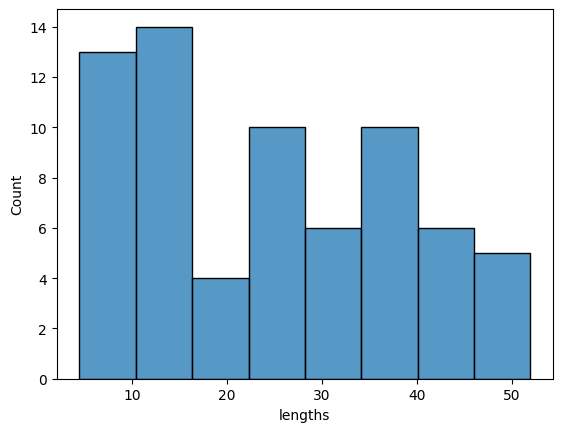

In [20]:
sns.histplot(data = bouts, x = 'lengths')

<AxesSubplot:xlabel='lengths', ylabel='Density'>

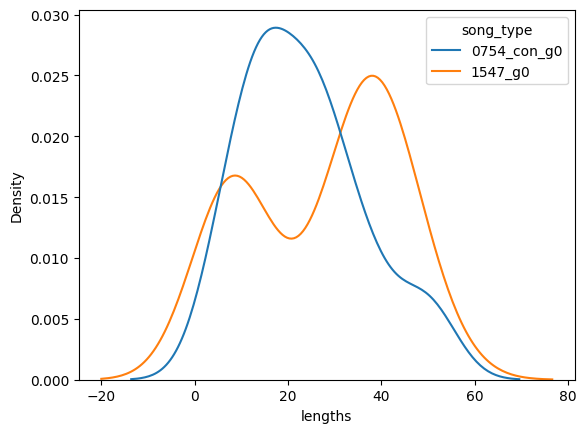

In [21]:
sns.kdeplot(data = bouts, x = 'lengths', hue = 'song_type', common_norm = False)

<AxesSubplot:xlabel='lengths', ylabel='Count'>

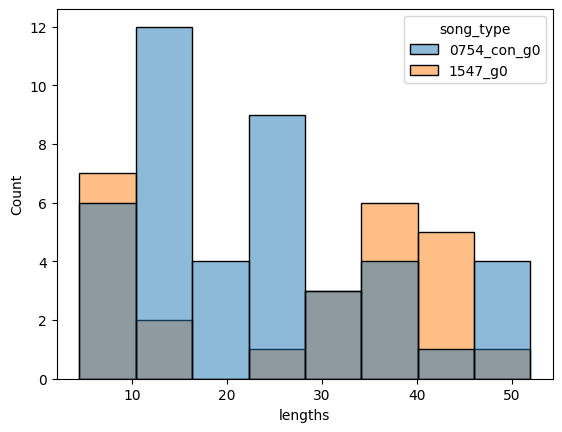

In [22]:
sns.histplot(data = bouts, x = 'lengths', hue = 'song_type', common_norm = False)

In [23]:
from scipy.stats import ks_2samp, ttest_ind

In [24]:
ks_2samp(bouts[bouts.song_type == '0754_con_g0'].lengths, bouts[bouts.song_type == '1547_g0'].lengths)

KstestResult(statistic=0.3674418604651163, pvalue=0.0202516008988379)

In [25]:
ttest_ind(bouts[bouts.song_type == '0754_con_g0'].lengths, bouts[bouts.song_type == '1547_g0'].lengths)

Ttest_indResult(statistic=-1.2140479584701398, pvalue=0.22905578408655922)

<AxesSubplot:xlabel='position', ylabel='lengths'>

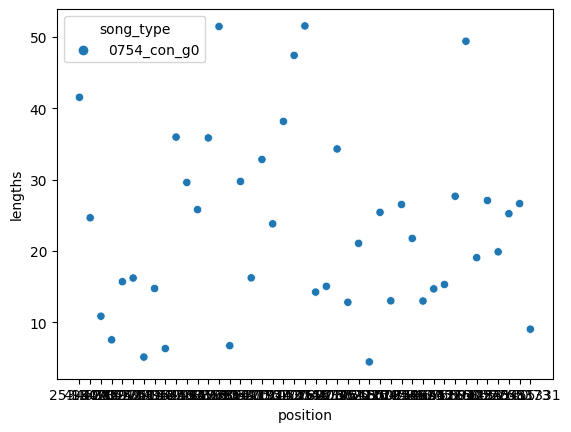

In [29]:
sns.scatterplot(data = bouts[bouts.song_type == '0754_con_g0'], x = 'position', y = 'lengths', hue = 'song_type')

<AxesSubplot:xlabel='position', ylabel='lengths'>

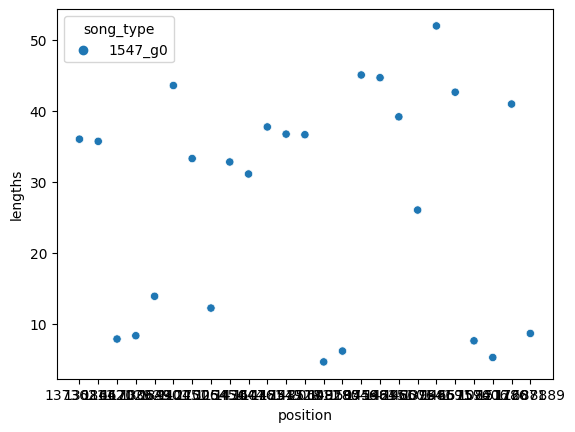

In [30]:
sns.scatterplot(data = bouts[bouts.song_type == '1547_g0'], x = 'position', y = 'lengths', hue = 'song_type')